# Dask Dashboard

It is a really nice feature from dask distributed to have a dashboard of currently running processes.

However, the default configuration sets the link wrong.

In [1]:
from dask.distributed import Client, progress
client = Client(threads_per_worker=4, n_workers=1)
client

/home/swd/spack/opt/spack/linux-rhel8-skylake_avx512/gcc-8.4.1/anaconda3-2020.11-v46okvjlotnor7yrmpqnbn63xt3a2qyq/lib/python3.8/site-packages/distributed/node.py:151: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 33323 instead
  warnings.warn(


<Client: 'tcp://127.0.0.1:37781' processes=1 threads=4, memory=809.71 GB>

this local Link: `Dashboard: http://127.0.0.1:33323/status` can not be reached from the TeachingHub.

## Fix the configuration
This will add the required configuration options.

*Note: Check by hand, if you have more options enabled*

In [10]:
%%writefile -a ~/.config/dask/distributed.yaml
distributed:
    dashboard:
        link: "/hub/user/{JUPYTERHUB_USER}/proxy/{port}/status"

Appending to /home/spack/.config/dask/distributed.yaml


## Distributed configuration file

In [9]:
# %load ~/.config/dask/distributed.yaml
# distributed:
#   version: 2
#   # logging:
#   #   distributed: info
#   #   distributed.client: warning
#   #   bokeh: critical
#   #   # http://stackoverflow.com/questions/21234772/python-tornado-disable-logging-to-stderr
#   #   tornado: critical
#   #   tornado.application: error

#   scheduler:
#     allowed-failures: 3     # number of retries before a task is considered bad
#     bandwidth: 100000000    # 100 MB/s estimated worker-worker bandwidth
#     blocked-handlers: []
#     default-data-size: 1kiB
#     # Number of seconds to wait until workers or clients are removed from the events log
#     # after they have been removed from the scheduler
#     events-cleanup-delay: 1h
#     idle-timeout: null      # Shut down after this duration, like "1h" or "30 minutes"
#     transition-log-length: 100000
#     work-stealing: True     # workers should steal tasks from each other
#     work-stealing-interval: 100ms  # Callback time for work stealing
#     worker-ttl: null        # like '60s'. Time to live for workers.  They must heartbeat faster than this
#     pickle: True            # Is the scheduler allowed to deserialize arbitrary bytestrings
#     preload: []             # Run custom modules with Scheduler
#     preload-argv: []        # See https://docs.dask.org/en/latest/setup/custom-startup.html
#     unknown-task-duration: 500ms  # Default duration for all tasks with unknown durations ("15m", "2h")
#     default-task-durations:  # How long we expect function names to run ("1h", "1s") (helps for long tasks)
#       rechunk-split: 1us
#       shuffle-split: 1us
#     validate: False         # Check scheduler state at every step for debugging
#     dashboard:
#       status:
#         task-stream-length: 1000
#       tasks:
#         task-stream-length: 100000
#       tls:
#         ca-file: null
#         key: null
#         cert: null
#       bokeh-application:  # keywords to pass to BokehTornado application
#         allow_websocket_origin: ["*"]
#         keep_alive_milliseconds: 500
#         check_unused_sessions_milliseconds: 500
#     locks:
#       lease-validation-interval: 10s  # The time to wait until an acquired semaphore is released if the Client goes out of scope
#       lease-timeout: 30s  # The timeout after which a lease will be released if not refreshed

#     http:
#       routes:
#         - distributed.http.scheduler.prometheus
#         - distributed.http.scheduler.info
#         - distributed.http.scheduler.json
#         - distributed.http.health
#         - distributed.http.proxy
#         - distributed.http.statics

#   worker:
#     blocked-handlers: []
#     multiprocessing-method: spawn
#     use-file-locking: True
#     connections:            # Maximum concurrent connections for data
#       outgoing: 50          # This helps to control network saturation
#       incoming: 10
#     preload: []             # Run custom modules with Worker
#     preload-argv: []        # See https://docs.dask.org/en/latest/setup/custom-startup.html
#     daemon: True
#     validate: False         # Check worker state at every step for debugging
#     lifetime:
#       duration: null        # Time after which to gracefully shutdown the worker
#       stagger: 0 seconds    # Random amount by which to stagger lifetimes
#       restart: False        # Do we ressurrect the worker after the lifetime deadline?

#     profile:
#       interval: 10ms        # Time between statistical profiling queries
#       cycle: 1000ms         # Time between starting new profile
#       low-level: False      # Whether or not to include low-level functions
#                             # Requires https://github.com/numba/stacktrace

#     # Fractions of worker memory at which we take action to avoid memory blowup
#     # Set any of the lower three values to False to turn off the behavior entirely
#     memory:
#       target: 0.60  # target fraction to stay below
#       spill: 0.70  # fraction at which we spill to disk
#       pause: 0.80  # fraction at which we pause worker threads
#       terminate: 0.95  # fraction at which we terminate the worker

#     http:
#       routes:
#         - distributed.http.worker.prometheus
#         - distributed.http.health
#         - distributed.http.statics

#   nanny:
#     preload: []             # Run custom modules with Nanny
#     preload-argv: []        # See https://docs.dask.org/en/latest/setup/custom-startup.html

#   client:
#     heartbeat: 5s  # Interval between client heartbeats
#     scheduler-info-interval: 2s  # Interval between scheduler-info updates

#   deploy:
#     lost-worker-timeout: 15s  # Interval after which to hard-close a lost worker job
#     cluster-repr-interval: 500ms  # Interval between calls to update cluster-repr for the widget

#   adaptive:
#     interval: 1s         # Interval between scaling evaluations
#     target-duration: 5s  # Time an entire graph calculation is desired to take ("1m", "30m")
#     minimum: 0           # Minimum number of workers
#     maximum: .inf        # Maximum number of workers
#     wait-count: 3        # Number of times a worker should be suggested for removal before removing it

#   comm:
#     retry:  # some operations (such as gathering data) are subject to re-tries with the below parameters
#       count: 0  # the maximum retry attempts. 0 disables re-trying.
#       delay:
#          min: 1s  # the first non-zero delay between re-tries
#          max: 20s  # the maximum delay between re-tries
#     compression: auto
#     offload: 10MiB # Size after which we choose to offload serialization to another thread
#     default-scheme: tcp
#     socket-backlog: 2048
#     recent-messages-log-length: 0  # number of messages to keep for debugging

#     zstd:
#       level: 3      # Compression level, between 1 and 22.
#       threads: 0    # Threads to use. 0 for single-threaded, -1 to infer from cpu count.

#     timeouts:
#       connect: 10s          # time before connecting fails
#       tcp: 30s              # time before calling an unresponsive connection dead

#     require-encryption: null # Whether to require encryption on non-local comms

#     tls:
#       ciphers: null   # Allowed ciphers, specified as an OpenSSL cipher string.
#       ca-file: null   # Path to a CA file, in pem format, optional
#       scheduler:
#         cert: null    # Path to certificate file for scheduler.
#         key: null     # Path to key file for scheduler. Alternatively, the key
#                       # can be appended to the cert file above, and this field
#                       # left blank.
#       worker:
#         key: null
#         cert: null
#       client:
#         key: null
#         cert: null


#   ###################
#   # Bokeh dashboard #
#   ###################

#   dashboard:
#     link: "{scheme}://{host}:{port}/status"
#     export-tool: False
#     graph-max-items: 5000  # maximum number of tasks to try to plot in graph view

#   ##################
#   # Administrative #
#   ##################

#   admin:
#     tick:
#       interval: 20ms  # time between event loop health checks
#       limit: 3s       # time allowed before triggering a warning

#     max-error-length: 10000 # Maximum size traceback after error to return
#     log-length: 10000  # default length of logs to keep in memory
#     log-format: '%(name)s - %(levelname)s - %(message)s'
#     pdb-on-err: False       # enter debug mode on scheduling error
# rmm:
#   pool-size: null
# ucx:
#   tcp: null  # enable tcp
#   nvlink: null  # enable cuda_ipc
#   infiniband: null # enable Infiniband
#   rdmacm: null # enable RDMACM
#   cuda_copy: null  # enable cuda-copy
#   net-devices: null  # define which Infiniband device to use


## Check

1. Restart the Kernel
2. Execute Code below

In [1]:
from dask.distributed import Client, progress
client = Client(threads_per_worker=4, n_workers=1)
client

/home/swd/spack/opt/spack/linux-rhel8-skylake_avx512/gcc-8.4.1/anaconda3-2020.11-v46okvjlotnor7yrmpqnbn63xt3a2qyq/lib/python3.8/site-packages/distributed/node.py:151: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 38859 instead
  warnings.warn(


<Client: 'tcp://127.0.0.1:37157' processes=1 threads=4, memory=809.71 GB>

Nevermind the warnings, but the dask dashboard tries to launch always on the same port.

In [5]:
import time
import random
import pandas as pd
import numpy as np
import dask

print("Dask Version", dask.__version__)

def costly_simulation(list_param):
    time.sleep(random.random())
    return sum(list_param)

input_params = pd.DataFrame(np.random.random(size=(500, 4)),
                            columns=['param_a', 'param_b', 'param_c', 'param_d'])
print(input_params.head())
lazy_results = []
# Setup
for parameters in input_params.values[:10]:
    lazy_result = dask.delayed(costly_simulation)(parameters)
    lazy_results.append(lazy_result)


Dask Version 2.30.0
    param_a   param_b   param_c   param_d
0  0.061172  0.040560  0.362118  0.994508
1  0.143198  0.690496  0.987174  0.640211
2  0.781419  0.487939  0.630510  0.959628
3  0.263620  0.452732  0.355212  0.626377
4  0.695966  0.983888  0.541850  0.119032


In [9]:
# Execute
%time dask.compute(*lazy_results)

CPU times: user 155 ms, sys: 12.2 ms, total: 167 ms
Wall time: 830 ms


(1.4583585077669654,
 2.46107941660282,
 2.8594963768382655,
 1.6979411932760518,
 2.340735532291646,
 2.4403596176237907,
 1.9791303749343807,
 2.5719688302776786,
 2.842447070669441,
 3.013128679508103)


This is what should happen in the browser window when you run the compute code. Click on the Link of your Dashboard;

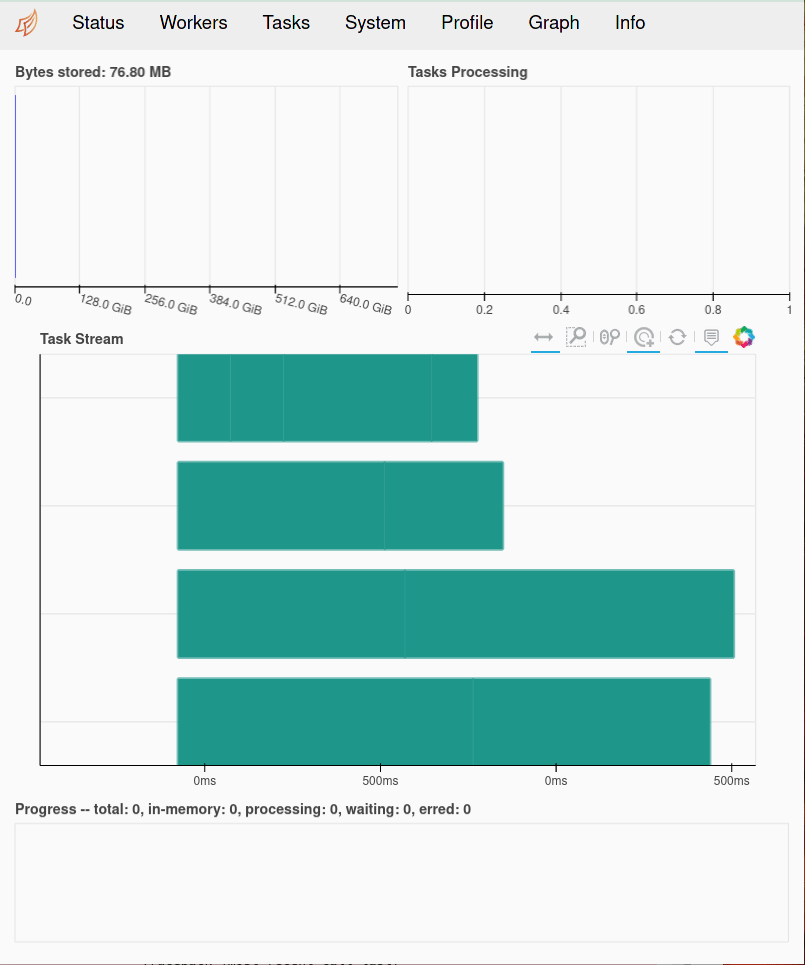